# DAND P2 Project: Analyse on dataset of Titanic

## 数据集背景

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive.

## 数据集说明

#### COLUMNS DESCRIPTIONS:
    
    survival        Survival   (0 = No; 1 = Yes)
    pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
    name            Name
    sex             Sex
    age             Age
    sibsp           Number of Siblings/Spouses Aboard
    parch           Number of Parents/Children Aboard
    ticket          Ticket Number
    fare            Passenger Fare
    cabin           Cabin
    embarked        Port of Embarkation
                    (C = Cherbourg; Q = Queenstown; S = Southampton)


# 分析报告 / Analyse Report

## 提出问题

<span style='color:blue'>**有哪些因素会让船上的人生还率更高？**</span>

## 读取数据集了解其结构并对数据进行必要的整理

In [1]:
#import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#让图标显示在notebook内
%matplotlib inline

#让图片适应视网膜屏精度
%config InlineBackend.figure_format = 'retina'

In [2]:
titanic_df = pd.read_csv('titanic_data.csv')

<span style='color:blue'>查看数据集</span>

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<span style='color:blue'>Name, Ticket, Cabin 这四列基本上对解决问题没有帮助，因此去除。其中Cabin中信息太少，所以也去除。</span>

In [4]:
# removed useless columns
titanic_df = titanic_df.drop([ 'Name', 'Ticket', 'Cabin'],axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [27]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<span style='color:blue'>以上看出，总体生还率是38.38%</span>

In [6]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
SibSp          891
Parch          891
Fare           891
Embarked       889
dtype: int64

<span style='color:blue'>Age列和Embarked列中有空值，先看看Embarked列的组成</span>

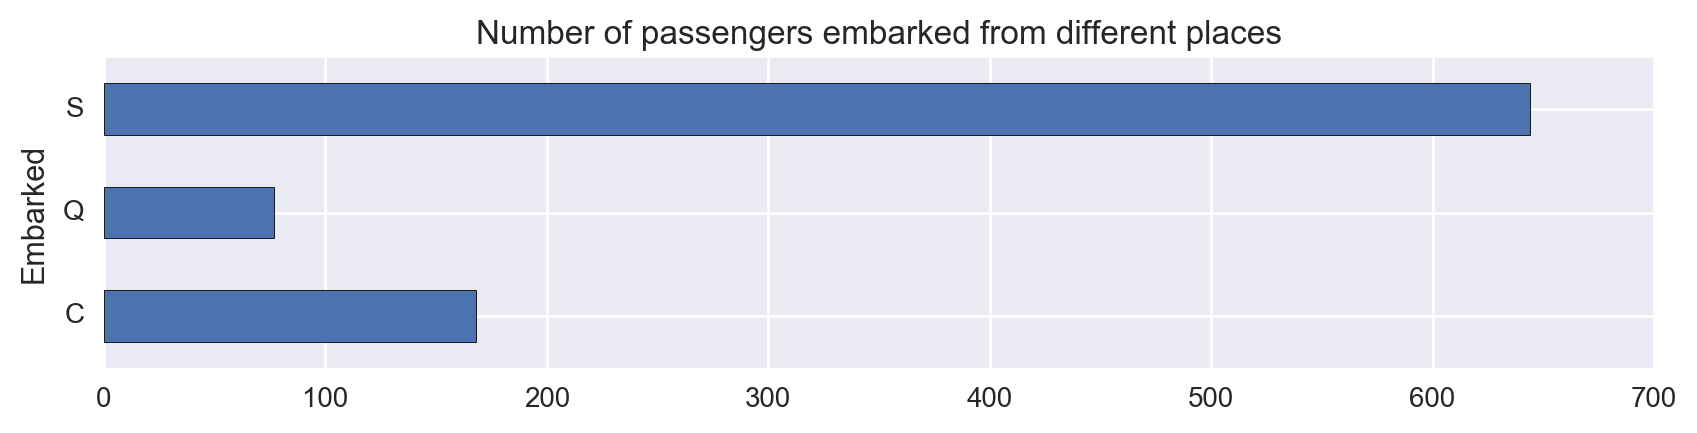

In [7]:
# bar chart to show the number of passengers boarding from different ports
titanic_df.groupby('Embarked')['Survived'].count().plot(kind='barh',
                                                        figsize=[10,2],
                                                        title='Number of passengers embarked from different places');

<span style='color:blue'>发现绝大部分的乘客(644人即72%)来自S即Southampton，所以把Emarked列中的2个空值也用S来取代</span>

In [8]:
# fill the empty cell with default port name: S
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

## 生还影响因素分析 1. Embarked

<span style='color:blue'>先来看看乘客的登船地点同最后生还与否是否有相关性，比较一下三地乘客分别的生还概率：</span>

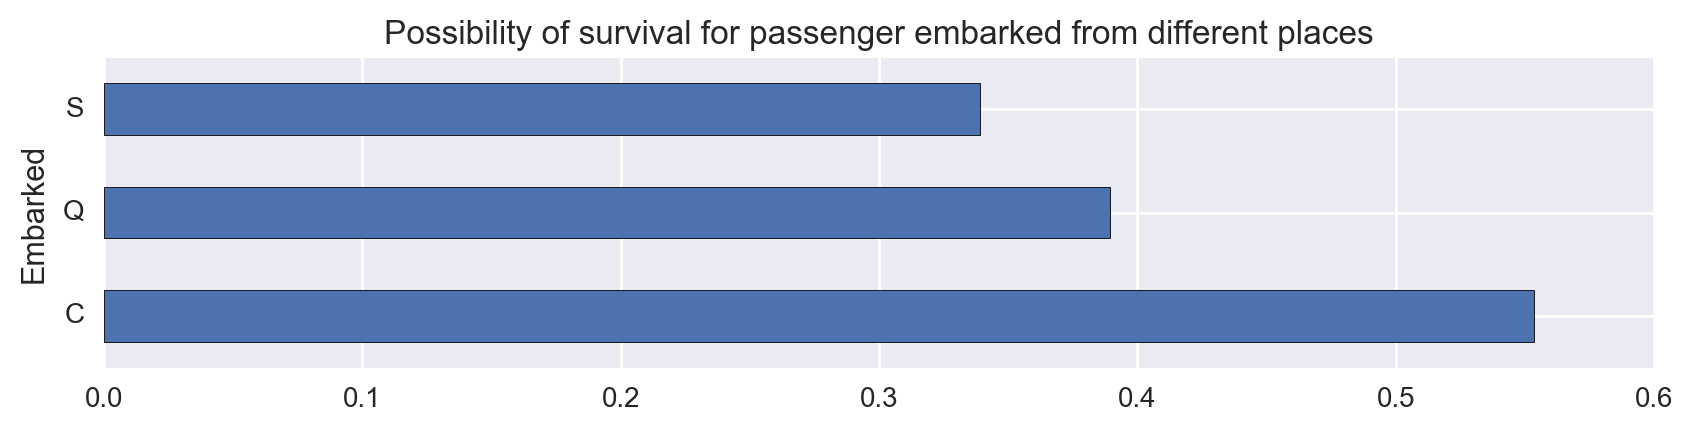

In [9]:
# bar chart to show the possibility of survival of passengers from each port
titanic_df.groupby('Embarked',as_index=True)['Survived'].mean().plot(kind='barh',
                                                                     figsize=[10,2],
                                                                     title='Possibility of survival for passenger embarked from different places');

<span style='color:blue'>从上图看出来自C所代表的Cherbourg的乘客中的生还概率(55%)要大大高于其他两地，所以暂且将上船地点做为影响生还几率的主要因素之一</span>

<span style='color:blue'>接下来看一下Cherbourg登船的乘客有些什么特点</span>

In [10]:
titanic_df.groupby('Embarked',as_index=True).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.517028,0.339009,2.346749,29.519335,0.569659,0.411765,27.243651


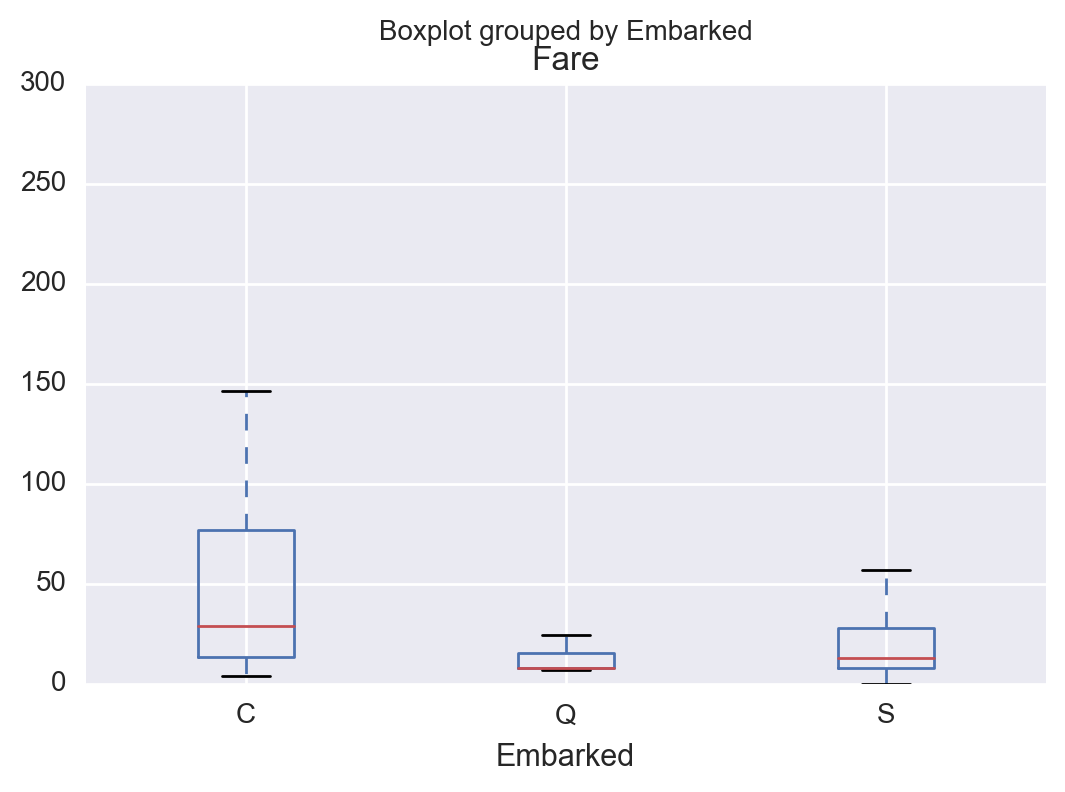

In [11]:
# function for replacing the outliers
def replace_outlier(fare):
    if fare > 500:
        return None
    else:
        return fare

# boxplot chart of the fare that the passengers from different port paid. 

boxplot_df = pd.DataFrame({
    'Fare': titanic_df['Fare'].apply(replace_outlier),
    'Embarked': titanic_df['Embarked']
})
    
boxplot_df.boxplot(column='Fare', by='Embarked', grid=True, figsize=(6,4), layout=None);

<span style='color:blue'>可以看出，Cherbourg登船的乘客相对更富有，因为他们的船舱等级更高，为此付出的票价总体要比其他两地登船的乘客高很多，那富有程度和生还率之间是否有联系呢？继续分析</span>

## 查找其他相关因素 - 粗筛

<span style='color:blue'>为了快速的查看生还几率和各数值数据之间的相关性，需要使用Pearson相关性系数，先来构建计算Pearson相关性系数的函数，并算出各项数据和生还之间的相关系数</span>

In [12]:
# function to calculate the Pearson's r
def correlation(x, y):   
    std_x = x.std(ddof=0)
    mean_x = x.mean()
    standardrized_x = (x - mean_x) / std_x
    std_y = y.std(ddof=0)
    mean_y = y.mean()
    standardrized_y = (y - mean_y) / std_y
    multiply = standardrized_x * standardrized_y
    r = multiply.mean()
    
    return r

In [13]:
# creat DataFrame needed for generation Pearson's r
fare = titanic_df['Fare']
age = titanic_df['Age']
sib = titanic_df['SibSp']
par = titanic_df['Parch']
pclass = titanic_df['Pclass']
survived = titanic_df['Survived']

In [14]:
# calculate and list of Pearson's r for different pair of data
print '{} <-- 关注'.format(correlation(survived, fare))
print correlation(survived, age)
print correlation(survived, sib)
print correlation(survived, par)
print '{} <-- 关注'.format(correlation(survived, pclass))

0.257306522385 <-- 关注
-0.0779826784139
-0.0353224988857
0.0816294070835
-0.338481035961 <-- 关注


<span style='color:blue'>可以初步判断，船票价格、舱位等级同生还之间的相关性还是较大的，下面对这两项进行深入分析</span>

## 生还影响因素分析 2. 舱位等级和票价

In [15]:
titanic_df.groupby('Pclass',as_index=True).mean()[['Survived','Age','Fare']]

,Survived,Age,Fare
Pclass,,,
1,0.629630,38.233441,84.154687
2,0.472826,29.877630,20.662183
3,0.242363,25.140620,13.675550


<span style='color:blue'>以上数据进一步印证了之前的猜想，舱位等级越高，付出的票价越高，即越富有，生还的几率越大，一等舱的生还几率是约63.0%</span>

## 生还影响因素分析 3. 年龄

<span style='color:blue'>根据之前算出的Survived和Age之间的Pearson相关系数（-0.08），似乎表明年龄和生还与否并没有很大的关系，真的是这样吗，不是应该优先照顾儿童和妇女吗？先来看看乘客年龄的分布图吧</span>

In [16]:
titanic_df.groupby('Survived',as_index=True).mean()[['Age']]

,Age
Survived,
0,30.626179
1,28.343690


<span style='color:blue'>以上显示生还和身亡者的平均年龄没有太大差异，下面用直方图分别看看生还和身亡者的年龄的分布情况</span>

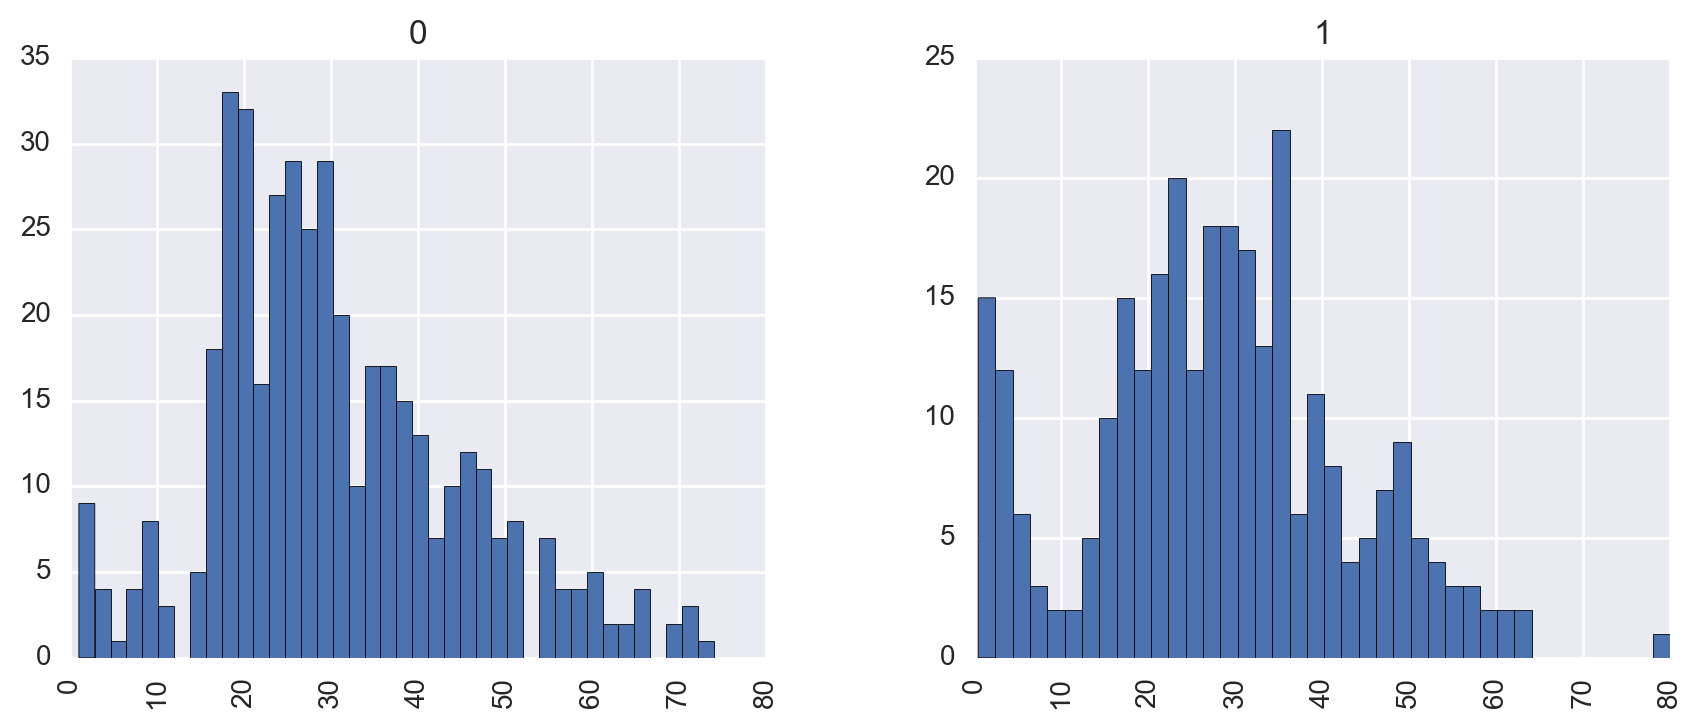

In [17]:
# distribution chart to show the distribution of the ages in year for dead and survived passenger
pd.DataFrame.hist(titanic_df,
                  column='Age',
                  by='Survived',
                  figsize=[10,4],
                  bins=40,
                 );

<span style='color:blue'>从上图看出，儿童（12岁以下） 的存活比例（看图估计大约60% - 具体数值后续会计算）相对于成人要高很多，算一下总体平均存活率是多少：</span>

In [18]:
titanic_df['Survived'].mean()

0.3838383838383838

<span style='color:blue'>可见，总体的平均生还几率是38.38%，远小于12岁以下未成年人的生还几率，所以暂时判定是否是儿童是生还与否的主要因素之一</span>

## 生还影响因素分析 3. 性别

In [19]:
titanic_df.groupby(['Sex','Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

<span style='color:blue'>从上可以看出女性的总体生还率是74%，远高于总体平均存活率38%，而有意思的是，一等舱和二等舱的女性几乎全部生还，而三等舱却只有50%的女性生还，进一步验证了有钱人家的女眷几乎是无敌的</span>

## 生还影响因素分析 4. 拖家带小的影响

<span style='color:blue'>为了方便分析，需要先通过向量化计算将SibSp和Parch两列数据简化为True/False，即是否有兄弟姐妹及配偶和是否有父母儿女</span>

<span style='color:blue'>创建titanic_df2 DataFrame来做为下一步分析的数据集（增加几列来存储简化后的信息：*是否有Sibling+Spous，是否有Parent+Child，是否有两者都有，是否为未成年人*</span>

In [20]:
# Following code used to creat a new extended version of the titanic dataset

PassengerId = titanic_df['PassengerId']
SibSp_values = titanic_df['SibSp']
Parch_values = titanic_df['Parch']
Age_values = titanic_df['Age']

# 该函数来用来判断某一年龄数据为 Adult，Child，对于Nan数据返回Unknow
def Child(age):
    if age <= 12 and age >= 0:
        return 'Child'
    if age > 12 and age <= 150:
        return 'Adult'
    else:
        return "Unknown"



df1 = pd.DataFrame({
    'PassengerId': PassengerId,
    'hasSibSp': SibSp_values == 0,
    'hasParch': Parch_values == 0,
    'hasSibSp_noParch': (SibSp_values == 0) & (Parch_values != 0),
    'noSibSp_hasParch': (SibSp_values != 0) & (Parch_values == 0),
    'hasBoth': (SibSp_values == 0) & (Parch_values == 0),
    'Child': Age_values.apply(Child)
})

#创建titanic_df2 DataFrame来做为下一步分析的数据集
titanic_df2 = titanic_df.merge(df1,on='PassengerId')
titanic_df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child,hasBoth,hasParch,hasSibSp,hasSibSp_noParch,noSibSp_hasParch
0,1,0,3,male,22.0,1,0,7.2500,S,Adult,False,True,False,False,True
1,2,1,1,female,38.0,1,0,71.2833,C,Adult,False,True,False,False,True
2,3,1,3,female,26.0,0,0,7.9250,S,Adult,True,True,True,False,False
3,4,1,1,female,35.0,1,0,53.1000,S,Adult,False,True,False,False,True
4,5,0,3,male,35.0,0,0,8.0500,S,Adult,True,True,True,False,False


In [21]:
titanic_df2.groupby('hasSibSp').mean()['Survived']

hasSibSp
False    0.466431
True     0.345395
Name: Survived, dtype: float64

In [22]:
titanic_df2.groupby('hasParch').mean()['Survived']

hasParch
False    0.511737
True     0.343658
Name: Survived, dtype: float64

<span style='color:blue'>可见没有兄弟姐妹配偶的或者没有父母儿女的乘客似乎生存几率更大一些，再进一步看看两个因素组合起来会有什么发现没有：</span>

In [23]:
titanic_df2.groupby('hasSibSp_noParch').mean()['Survived']

hasSibSp_noParch
False    0.359756
True     0.661972
Name: Survived, dtype: float64

In [24]:
titanic_df2.groupby('noSibSp_hasParch').mean()['Survived']

noSibSp_hasParch
False    0.362667
True     0.496454
Name: Survived, dtype: float64

In [25]:
titanic_df2.groupby('hasBoth').mean()['Survived']

hasBoth
False    0.505650
True     0.303538
Name: Survived, dtype: float64

<span style='color:blue'>那些有配偶或兄弟姐妹而没有父母儿女的乘客的存活率相对较高，达到66%；同时，那些没有兄弟姐妹而有父母儿女的乘客的存活率相对就没那么高了，看来这两个合并因素也是一个重要的影响因素之一</span>

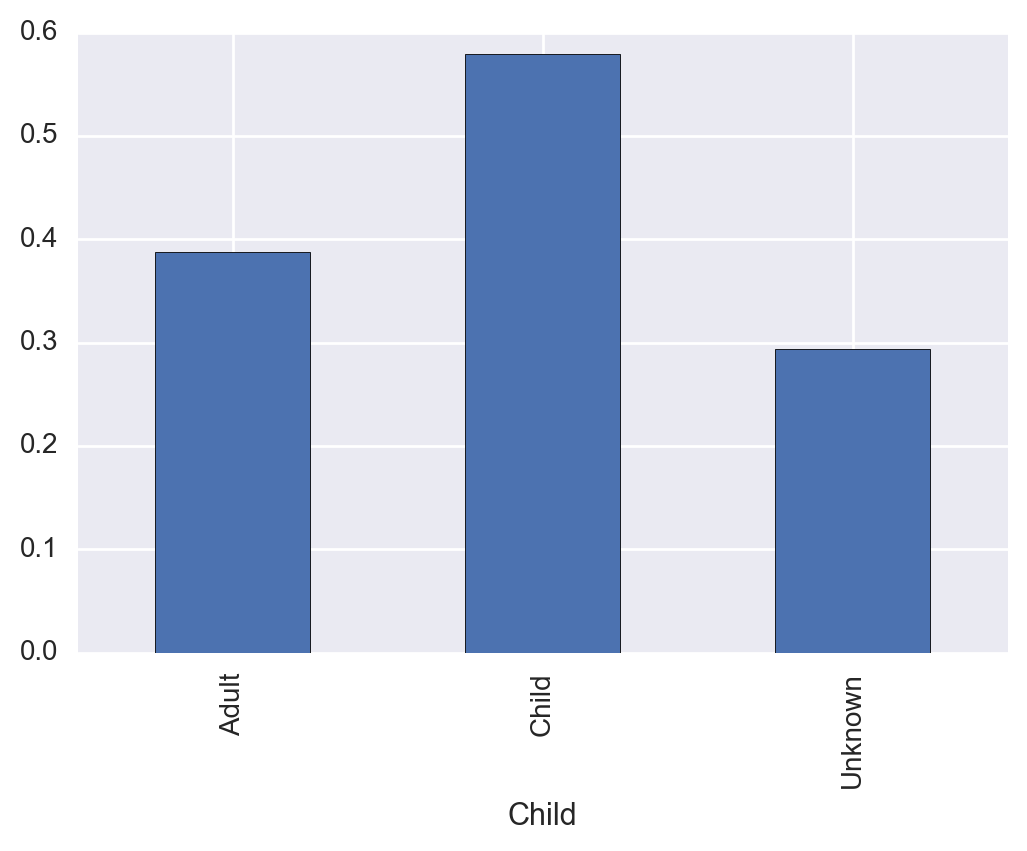

In [26]:
#12岁及以下儿童的存活率
titanic_df2.groupby('Child').mean()['Survived'].plot(kind='bar',
                                                        figsize=[6,4],
                                                                     );

<span style='color:blue'>通过扩展后的数据集，还可以在此验证一下儿童的存活率，以上图表可以看出：12岁以下儿童的存活率达到了58%，再次印证了之前的结论</span>

# 结论

<span style='color:blue'>根据以上分析，可以得出结论，以下因素可能会使生还几率更高：</span>
- **有经济实力**（可以坐更高等级舱位，买更高价的船票），
- **女性** （妇孺儿童优先上救生船政策的结果，但三等舱的女性就没那么幸运了）
- **12岁以下儿童** （妇孺儿童优先上救生船的政策的结果）
- **和配偶或者兄弟姐妹同行** （人多互相照应？）
- **从法国瑟堡登船** （可能因为都是有钱有身份的人的缘故，没有直接证据表明他们的的求生技能更高）

<span style='color:blue'>但必须要意识到以上的结论只是暂时的，比如从瑟堡登船的旅客普遍经济实力较高，所以也许瑟堡的乘客生还几率高和其登船点没有太大关系；该数据集中有约20%的乘客没有年龄信息，所以在年龄对生还几率的判断可能会有误或不完整；另外，该数据集并没有包涵所有的乘客，根据[查阅资料][1]，泰坦尼克号总的乘客及船员总数是2208，其中705人生还，因此以上的分析的结果可能由于数据的不完整而有失偏颇。</span>

#### 参考资料
* Sinking of the RMS Titanic - Wikipedia [Link](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic)    
* Matplotlib Dcumentation - pylot [Link](http://matplotlib.org/1.4.2/api/pyplot_api.html#matplotlib.pyplot.bar)
* A Journey through Titanic - Kaggle [Link](https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic/notebook)

<span style='color:blue'></span>